# Operations and kernels

## Overview of operations and kernels

### Operations in G-API:
* **Introduction**:  G-API constructs graphs using **Operations** on **Virtual Data**.

* **Functionality**: Operations play a key role in G-API as they define interfaces for the structure and functionality of the graph.

* **Flexibility**: Operations are platform-agnostic, e enabling them to operate on any platform.

* **Customization**: Users have the capability to add and customize their own Operations.


### Kernels in G-API:
* **Introduction**: Kernels are implementations of Operations (like in object-oriented programming);

* **Functionality**: Unlike Operations, Kernels are platform-specific, their functionality depends on the specific hardware or software.

* **Usage**: Kernels are designed for Backends, which provide the necessary APIs for their creation.

* **Customization**: Users can not only add their own Kernels but also redefine "standard" kernels in their unique way.


As shown in the figure below, we can visually comprehend the relationship between the various components of a graph. 

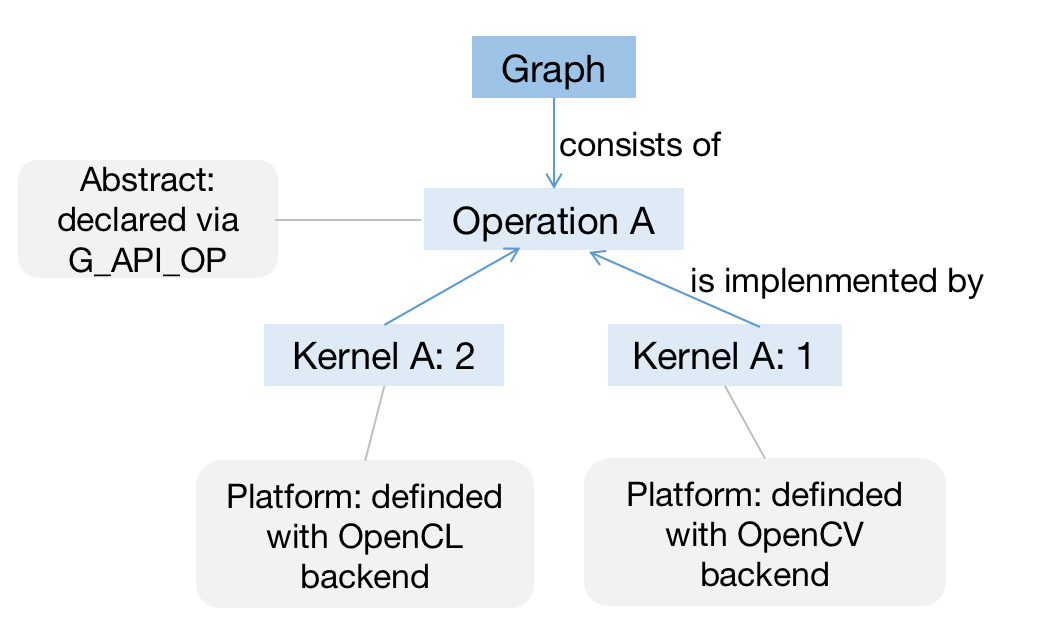

In [1]:
from IPython.display import Image
image_path = '/Users/anna/tutorials-py/resources/operations&kernels.png'
Image(filename=image_path)

## Declaring new operations in Python

In G-API, an operation is a functional unit that takes in some input, performs some computation, and produces some output. The definition of an operation contains important parts such as the type name, operation signature, operation identifier, and a metadata callback.

## Defining an operation

To define a new operation, we need:
* A type name (every operation is a Python type);

* Operation signature (similar to **cv.GArray.Int**);

* Operation identifier (a string);

* Metadata callback – describe what is the output value format(s), given the input and arguments.

 * Use **cv.gapi.op(...)** to use a new kernel **OpType** to construct graphs. 

For example, we can define an operation like this following code:

In [2]:
# Import OpenCV.
import cv2 as cv  
import numpy as np  
from typing import * 

In [3]:
# Define a new G-API operation 'custom.op'.
@cv.gapi.op('custom.op', in_types=[cv.GMat], out_types=[cv.GMat])
class GSqrt:
    # Define the output metadata for the operation.
    @staticmethod
    def outMeta(desc: Any):
        return desc

From this code, we known an operation defined by creating a new Python class **GSqrt** and using the **@cv.gapi.op(...)** decorator to specify the operation signature and identifier. This operation can then be used to construct graphs in G-API.

## Using kernels in Python 

In [4]:
# Define a kernel for the 'custom.op' operation.
# A kernel is the implementation of an operation.
@cv.gapi.kernel(GSqrt)
class GSqrtImpl:
    # Define the run function for the kernel.
    @staticmethod
    def run(input: cv.Mat) -> cv.Mat:
        return cv.sqrt(input)

In [5]:
# Define G-API computation.
g_in: cv.GMat = cv.GMat()
g_sqrt: cv.GMat = GSqrt.on(g_in)
g_computation: cv.GComputation = cv.GComputation(cv.GIn(g_in), cv.GOut(g_sqrt))

# Package the kernel.
pkg = cv.gapi.kernels(GSqrtImpl)

input: cv.Mat = cv.Mat(np.array([[1, 4], [16, 64]], dtype=np.float64))
out_sqrt = g_computation.apply(cv.gin(input), args=cv.gapi.compile_args(pkg))

# Display input and output.
print("The Input data:", input) 
print("The Sqrt of Input data:", out_sqrt)


The Input data: [[ 1.  4.]
 [16. 64.]]
The Sqrt of Input data: [[1. 2.]
 [4. 8.]]
